In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gc

import numpy
import torch
import torchvision
import torchvision.transforms.v2

transform = torchvision.transforms.v2.Compose([
    torchvision.transforms.v2.ToImage(),
    torchvision.transforms.v2.ToDtype(torch.float32, scale = True)
])

train = torchvision.datasets.CIFAR10('cifar-10', transform = transform, train = True, download = False)
test = torchvision.datasets.CIFAR10('cifar-10', transform = transform, train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) for item in train ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

train_images.shape, test_images.shape

((50000, 3, 32, 32), (10000, 3, 32, 32))

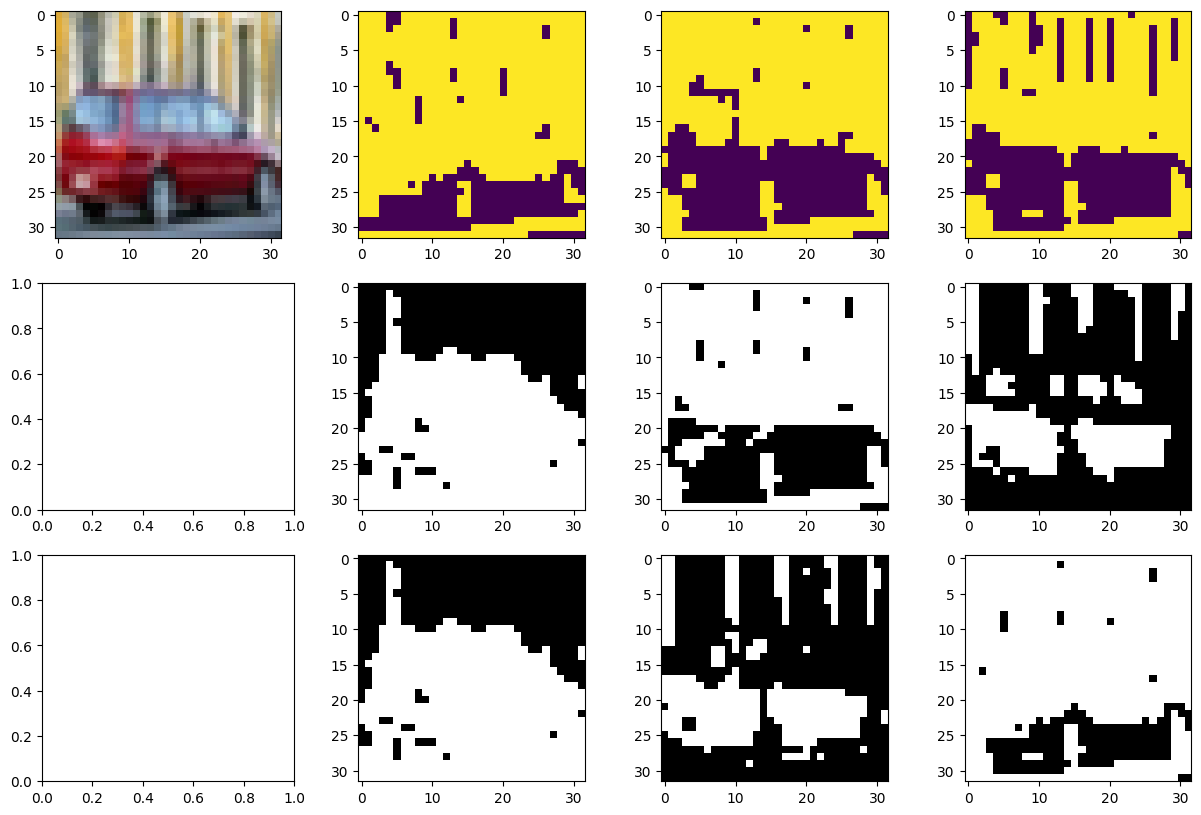

In [3]:
import colorsys
import gtda.images
import skimage.color
import matplotlib.pyplot as plt

def transform(data: numpy.ndarray):
    bin = gtda.images.Binarizer(threshold = 0.4)
    return bin.fit_transform(data)

OBJECT = 568
src = train_images[OBJECT]
res = numpy.zeros((3, 32, 32))
hsv = skimage.color.rgb2hsv(src.transpose((1, 2, 0))).transpose((2, 0, 1))

for i in range(32):
    for j in range(32):
        h, s, l = colorsys.rgb_to_hls(src[0, i, j], src[1, i, j], src[2, i, j])
        res[:, i, j] = (h, s, l)

figure, axes = plt.subplots(3, 4, figsize = (15, 10))
axes[0][0].imshow(src.transpose((1, 2, 0)))
axes[0][1].imshow(transform(src[0, :, :]))
axes[0][2].imshow(transform(src[1, :, :]))
axes[0][3].imshow(transform(src[2, :, :]))

axes[1][1].imshow(transform(res[0, :, :]), cmap = "gray")
axes[1][2].imshow(transform(res[1, :, :]), cmap = "gray")
axes[1][3].imshow(transform(res[2, :, :]), cmap = "gray")

axes[2][1].imshow(transform(hsv[0, :, :]), cmap = "gray")
axes[2][2].imshow(transform(hsv[1, :, :]), cmap = "gray")
axes[2][3].imshow(transform(hsv[2, :, :]), cmap = "gray")

In [4]:
import gtda.homology

cp = gtda.homology.CubicalPersistence(homology_dimensions = [ 0, 1, 2 ], n_jobs = -1)
train_diagrams = cp.fit_transform(train_images)
test_diagrams = cp.transform(test_images)

train_diagrams.shape, test_diagrams.shape

100%|██████████| 10000/10000 [00:20<00:00, 489.42it/s]


((50000, 654, 3), (10000, 567, 3))

In [6]:
import cvtda.topology

dtf = cvtda.topology.DiagramsToFeatures(batch_size = 1024)
train_features = dtf.fit_transform(train_diagrams)
test_features = dtf.transform(test_diagrams)

train_features.shape, test_features.shape

Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:03<00:00,  1.93s/it]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:06<00:00,  2.19s/it]


Fitting complete


Batch: 100%|██████████| 10/10 [05:14<00:00, 31.44s/it]


((50000, 390), (10000, 390))

In [10]:
train_features = numpy.minimum(train_features, 400000000)
test_features = numpy.minimum(test_features, 400000000)

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.2592, 'TOP-2 Accuracy': 0.423, 'TOP-3 Accuracy': 0.5538, 'TOP-4 Accuracy': 0.6528, 'TOP-5 Accuracy': 0.738, 'TOP-6 Accuracy': 0.8106, 'TOP-7 Accuracy': 0.8708, 'TOP-8 Accuracy': 0.9242, 'TOP-9 Accuracy': 0.9652, 'AUC-ROC': 0.6993855999999999, 'Precision': 0.24653461076225555, 'Recall': 0.2592, 'F1-score': 0.2492646496777054}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.3447, 'TOP-2 Accuracy': 0.5273, 'TOP-3 Accuracy': 0.646, 'TOP-4 Accuracy': 0.7425, 'TOP-5 Accuracy': 0.8123, 'TOP-6 Accuracy': 0.8713, 'TOP-7 Accuracy': 0.918, 'TOP-8 Accuracy': 0.956, 'TOP-9 Accuracy': 0.9807, 'AUC-ROC': 0.773470122222222, 'Precision': 0.33610419410332143, 'Recall': 0.3447, 'F1-score': 0.33748649108037965}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x000001C14C48A410>
Input to LazyLinear: 390
Parameters: 

100%|██████████| 25/25 [00:30<00:00,  1.21s/it, loss=1.11e+5, val_acc=0.139]


{'classifier': 'NNClassifier', 'Accuracy': 0.1394, 'TOP-2 Accuracy': 0.2597, 'TOP-3 Accuracy': 0.371, 'TOP-4 Accuracy': 0.4783, 'TOP-5 Accuracy': 0.5789, 'TOP-6 Accuracy': 0.6755, 'TOP-7 Accuracy': 0.7681, 'TOP-8 Accuracy': 0.8664, 'TOP-9 Accuracy': 0.9418, 'AUC-ROC': 0.60899715, 'Precision': 0.15425984126788422, 'Recall': 0.1394, 'F1-score': 0.08452848725543792}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.3312, 'TOP-2 Accuracy': 0.5157, 'TOP-3 Accuracy': 0.6472, 'TOP-4 Accuracy': 0.7424, 'TOP-5 Accuracy': 0.8194, 'TOP-6 Accuracy': 0.8798, 'TOP-7 Accuracy': 0.9291, 'TOP-8 Accuracy': 0.9601, 'TOP-9 Accuracy': 0.9838, 'AUC-ROC': 0.772097911111111, 'Precision': 0.32194088309247915, 'Recall': 0.3312, 'F1-score': 0.32082384784718354}
Fitting <catboost.core.CatBoostClassifier object at 0x000001C14C48A6B0>
Learning rate set to 0.309284
0:	learn:

d:\Programs\Programming\Python\lib\site-packages\xgboost\core.py:158: UserWarning: [14:14:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


{'classifier': 'XGBClassifier', 'Accuracy': 0.345, 'TOP-2 Accuracy': 0.5361, 'TOP-3 Accuracy': 0.6637, 'TOP-4 Accuracy': 0.7569, 'TOP-5 Accuracy': 0.8295, 'TOP-6 Accuracy': 0.8879, 'TOP-7 Accuracy': 0.9304, 'TOP-8 Accuracy': 0.9634, 'TOP-9 Accuracy': 0.9856, 'AUC-ROC': 0.7836160999999999, 'Precision': 0.3379059288375497, 'Recall': 0.34500000000000003, 'F1-score': 0.33705216169748337}


,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.2592,0.4230,0.5538,0.6528,0.7380,0.8106,0.8708,0.9242,0.9652,0.699386,0.246535,0.2592,0.249265
1,RandomForestClassifier,0.3447,0.5273,0.6460,0.7425,0.8123,0.8713,0.9180,0.9560,0.9807,0.773470,0.336104,0.3447,0.337486
2,NNClassifier,0.1394,0.2597,0.3710,0.4783,0.5789,0.6755,0.7681,0.8664,0.9418,0.608997,0.154260,0.1394,0.084528
3,HistGradientBoostingClassifier,0.3312,0.5157,0.6472,0.7424,0.8194,0.8798,0.9291,0.9601,0.9838,0.772098,0.321941,0.3312,0.320824
4,CatBoostClassifier,0.3627,0.5549,0.6764,0.7721,0.8428,0.8973,0.9386,0.9700,0.9897,0.796625,0.354843,0.3627,0.356417
5,XGBClassifier,0.3450,0.5361,0.6637,0.7569,0.8295,0.8879,0.9304,0.9634,0.9856,0.783616,0.337906,0.3450,0.337052


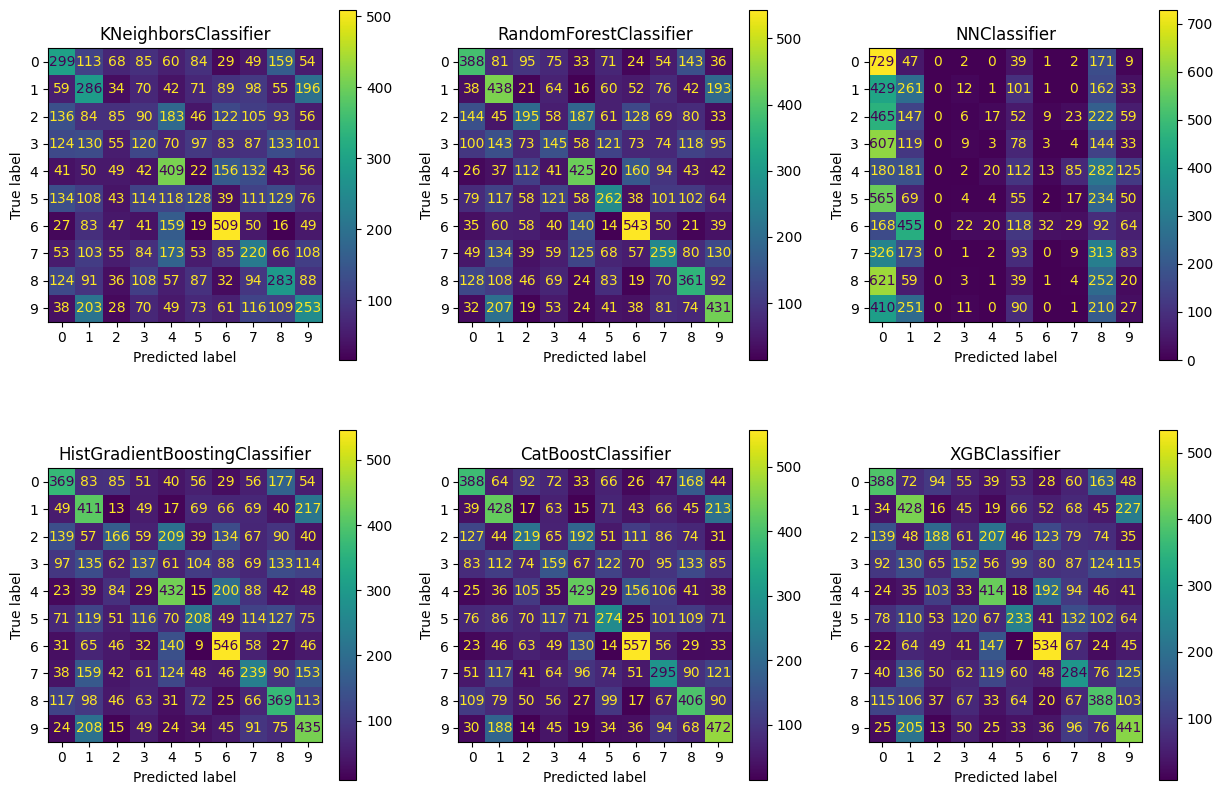

In [11]:
import cvtda.classification

cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

In [12]:
import sklearn.preprocessing

selected_standard_scaler = sklearn.preprocessing.StandardScaler()
train_features = selected_standard_scaler.fit_transform(train_features)
test_features = selected_standard_scaler.transform(test_features)

train_features.shape, test_features.shape

((50000, 390), (10000, 390))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.314, 'TOP-2 Accuracy': 0.4968, 'TOP-3 Accuracy': 0.6254, 'TOP-4 Accuracy': 0.722, 'TOP-5 Accuracy': 0.7977, 'TOP-6 Accuracy': 0.8551, 'TOP-7 Accuracy': 0.9079, 'TOP-8 Accuracy': 0.9478, 'TOP-9 Accuracy': 0.977, 'AUC-ROC': 0.7535328722222221, 'Precision': 0.3141860692482009, 'Recall': 0.314, 'F1-score': 0.3077050887966437}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.3395, 'TOP-2 Accuracy': 0.5266, 'TOP-3 Accuracy': 0.6447, 'TOP-4 Accuracy': 0.7364, 'TOP-5 Accuracy': 0.8118, 'TOP-6 Accuracy': 0.8726, 'TOP-7 Accuracy': 0.9202, 'TOP-8 Accuracy': 0.9534, 'TOP-9 Accuracy': 0.9797, 'AUC-ROC': 0.7720401111111111, 'Precision': 0.3312913446326756, 'Recall': 0.3395, 'F1-score': 0.3323211197111802}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x000001C1392EC160>
Input to LazyLinear: 390
Parameters: 1

100%|██████████| 25/25 [00:35<00:00,  1.42s/it, loss=1.06e+5, val_acc=0.337]


{'classifier': 'NNClassifier', 'Accuracy': 0.3374, 'TOP-2 Accuracy': 0.5231, 'TOP-3 Accuracy': 0.648, 'TOP-4 Accuracy': 0.7393, 'TOP-5 Accuracy': 0.8077, 'TOP-6 Accuracy': 0.8661, 'TOP-7 Accuracy': 0.9163, 'TOP-8 Accuracy': 0.9528, 'TOP-9 Accuracy': 0.979, 'AUC-ROC': 0.7578650111111112, 'Precision': 0.3296556171416593, 'Recall': 0.33740000000000003, 'F1-score': 0.3248370626571061}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.3314, 'TOP-2 Accuracy': 0.5157, 'TOP-3 Accuracy': 0.6473, 'TOP-4 Accuracy': 0.7426, 'TOP-5 Accuracy': 0.8193, 'TOP-6 Accuracy': 0.8798, 'TOP-7 Accuracy': 0.9291, 'TOP-8 Accuracy': 0.96, 'TOP-9 Accuracy': 0.9838, 'AUC-ROC': 0.7720986666666667, 'Precision': 0.32211435114793774, 'Recall': 0.33140000000000003, 'F1-score': 0.32099253529777144}
Fitting <catboost.core.CatBoostClassifier object at 0x000001C1392ECDF0>
Learning 

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3140,0.4968,0.6254,0.7220,0.7977,0.8551,0.9079,0.9478,0.9770,0.753533,0.314186,0.3140,0.307705
1,RandomForestClassifier,0.3395,0.5266,0.6447,0.7364,0.8118,0.8726,0.9202,0.9534,0.9797,0.772040,0.331291,0.3395,0.332321
2,NNClassifier,0.3374,0.5231,0.6480,0.7393,0.8077,0.8661,0.9163,0.9528,0.9790,0.757865,0.329656,0.3374,0.324837
3,HistGradientBoostingClassifier,0.3314,0.5157,0.6473,0.7426,0.8193,0.8798,0.9291,0.9600,0.9838,0.772099,0.322114,0.3314,0.320993
4,CatBoostClassifier,0.3602,0.5565,0.6740,0.7689,0.8394,0.8972,0.9380,0.9683,0.9879,0.795450,0.353121,0.3602,0.354275
5,XGBClassifier,0.3432,0.5380,0.6616,0.7558,0.8292,0.8884,0.9324,0.9629,0.9847,0.785420,0.334776,0.3432,0.334352


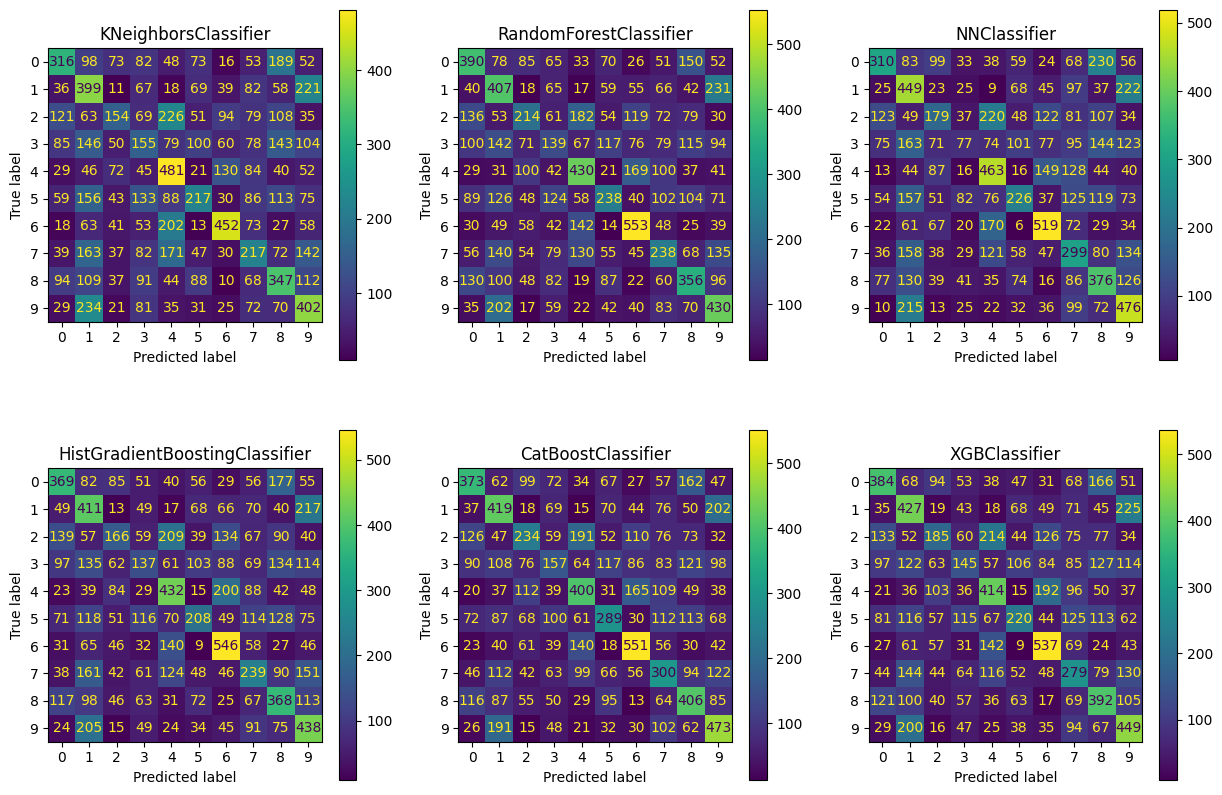

In [13]:
import cvtda.classification

cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

Fitting the information value feature selector


information values: 100%|██████████| 390/390 [00:11<00:00, 32.71it/s]

Fitting complete


<Axes: >

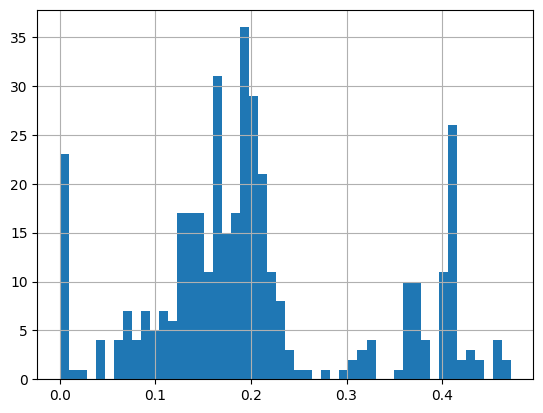

In [14]:
feature_selector = cvtda.classification.InformationValueFeatureSelector(threshold = 0.1, bins = 50)
feature_selector.fit(train_features, train_labels).hist()

Fitting the correlations feature selector
Fitting complete


d:\Programs\Programming\Python\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\Programs\Programming\Python\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


(array([ 12.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   8.,  28.,  58.,
        104.,  73.,  39.,  29.,  36.,   1.]),
 array([-1.        , -0.97689236, -0.95378472, -0.93067708, -0.90756943,
        -0.88446179, -0.86135415, -0.83824651, -0.81513887, -0.79203123,
        -0.76892358, -0.74581594, -0.7227083 , -0.69960066, -0.67649302,
        -0.65338538, -0.63027774, -0.60717009, -0.58406245, -0.56095481,
        -0.53784717, -0.51473953, -0.49163189, -0.46852424, -0.4454166 ,
        -0.42230896, -0.39920132, -0.37609368, -0.35298604, -0.3298784 ,
        -0.30677075, -0.28366311, -0.26055547, -0.23744783, -0.21434019,
        -0.19123255, -0.1681249 , -0.14501726, -0.12190962, -0.09880198,
        -0.07569434, -0.0525867 , -0.02947906, -0.00637141,  0.01673623,
 

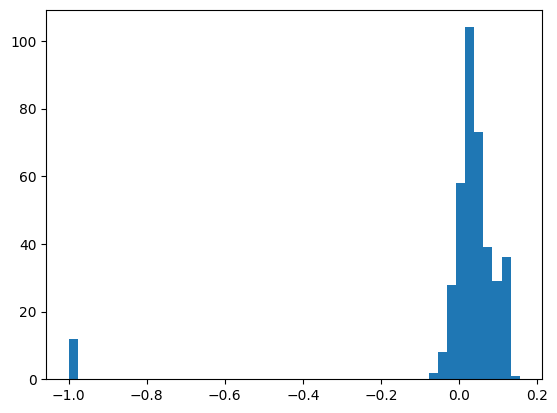

In [18]:
correlation_selector = cvtda.classification.CorrelationSelector(threshold = 0.05)
correlation_selector.fit(train_features, train_labels).hist()

In [20]:
numpy.save("5/train_features.npy", train_features)
numpy.save("5/test_features.npy", test_features)

In [3]:
train_features = numpy.hstack([
    numpy.load("5/train_features.npy"),
    numpy.load("1/train_features.npy")
])
test_features = numpy.hstack([
    numpy.load("5/test_features.npy"),
    numpy.load("1/test_features.npy")
])

train_features.shape, test_features.shape

((50000, 40514), (10000, 40514))

In [4]:
import sklearn.preprocessing

selected_standard_scaler = sklearn.preprocessing.StandardScaler()
train_features = selected_standard_scaler.fit_transform(train_features)
test_features = selected_standard_scaler.transform(test_features)

train_features.shape, test_features.shape

((50000, 40514), (10000, 40514))

Fitting <catboost.core.CatBoostClassifier object at 0x0000024B91BF0760>
Learning rate set to 0.309284
0:	learn: 2.1544128	total: 1.42s	remaining: 9m 25s
1:	learn: 2.0707509	total: 2.52s	remaining: 8m 22s
2:	learn: 2.0104081	total: 3.66s	remaining: 8m 3s
3:	learn: 1.9664759	total: 4.73s	remaining: 7m 48s
4:	learn: 1.9237117	total: 5.86s	remaining: 7m 43s
5:	learn: 1.8954486	total: 6.91s	remaining: 7m 34s
6:	learn: 1.8671622	total: 7.97s	remaining: 7m 27s
7:	learn: 1.8455866	total: 9.03s	remaining: 7m 22s
8:	learn: 1.8270034	total: 10.1s	remaining: 7m 17s
9:	learn: 1.8067875	total: 11.2s	remaining: 7m 17s
10:	learn: 1.7908427	total: 12.3s	remaining: 7m 15s
11:	learn: 1.7750942	total: 13.4s	remaining: 7m 13s
12:	learn: 1.7622833	total: 14.5s	remaining: 7m 11s
13:	learn: 1.7483788	total: 15.6s	remaining: 7m 11s
14:	learn: 1.7343922	total: 16.8s	remaining: 7m 10s
15:	learn: 1.7204522	total: 17.8s	remaining: 7m 8s
16:	learn: 1.7106944	total: 18.9s	remaining: 7m 5s
17:	learn: 1.6988692	total:

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,CatBoostClassifier,0.5463,0.7434,0.8417,0.9018,0.9398,0.9652,0.9805,0.9913,0.9969,0.904813,0.542634,0.5463,0.544088


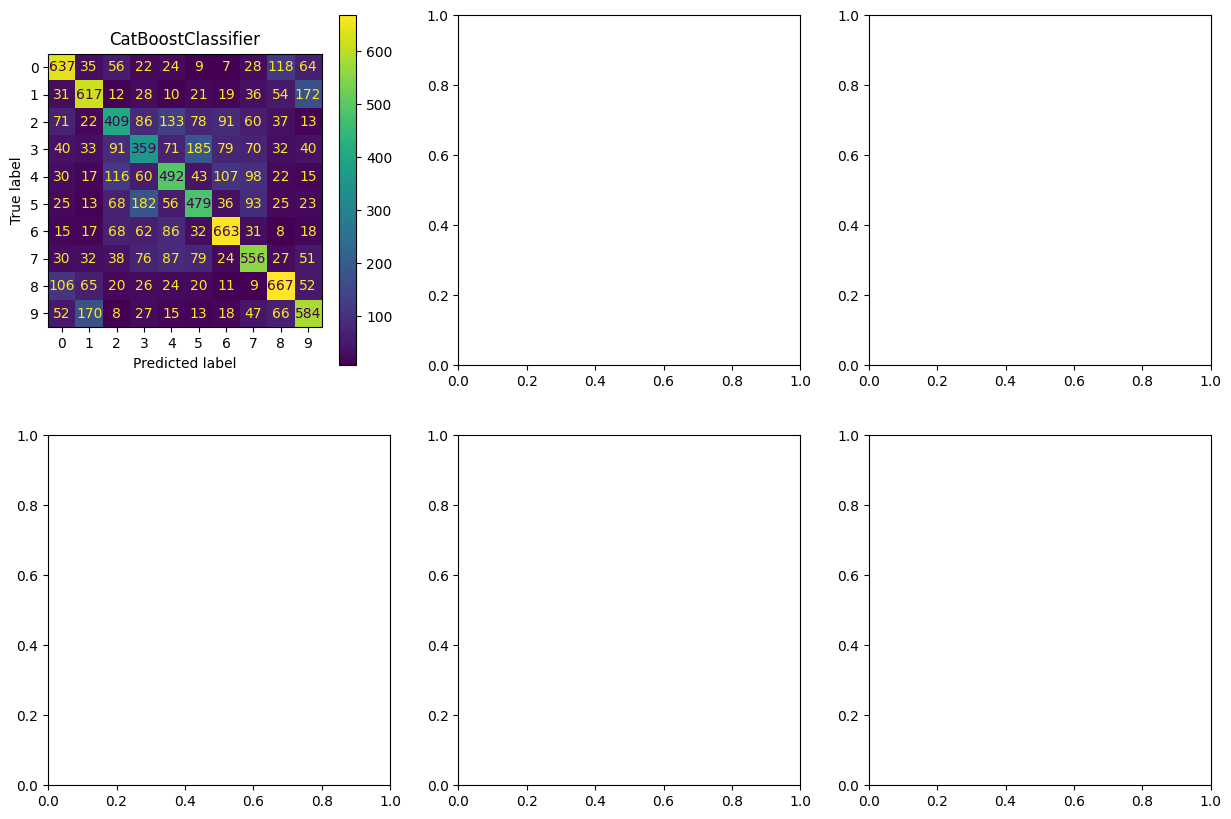

In [5]:
import cvtda.classification

cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)